Credit- All the resources is from the tutorial 'Machine Learning with Python and Scikit-Learn' 
https://youtu.be/hDKCxebp88A?si=Dw7AcnMOelG-p-rQ

    In this notebook, we'll explore a step-by-step process for approaching ML problems:

1. Understand the business requirements and the nature of the available data.

2. Classify the problem as supervised/unsupervised and regression/classification.

3. Download, clean & explore the data and create new features that may improve models.

4. Create training/test/validation sets and prepare the data for training ML models.

5. Create a quick & easy baseline model to evaluate and benchmark future models.

6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.

7. Experiment and combine results from multiple strategies to get a better result.

8. Interpret models, study individual predictions, and present your findings.

<img src='Approach ML.png'>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Step 1 - Understand Business Requirements & Nature of Data

### Understanding the Big Picture
    The first step in any machine learning problem is to read the given documentation, talk to various stakeholders and identify the following:

>What is the business problem you're trying to solve using machine learning?

>Why are we interested in solving this problem? What impact will it have on the business?

>How is this problem solved currently, without any machine learning tools?

>Who will use the results of this model, and how does it fit into other business processes?

>How much historical data do we have, and how was it collected?

>What features does the historical data contain? Does it contain the historical values for what we're trying to predict.

>What are some known issues with the data (data entry errors, missing data, differences in units etc.)

>Can we look at some sample rows from the dataset? How representative are they of the entire dataset.

>Where is the data stored and how will you get access to it?

>Gather as much information about the problem as possible, so that you're clear understanding of the objective and feasibility of the project.

## Step 2 - Classify the problem as supervised/unsupervised & regression/classification
>Here's the landscape of machine learning(https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e):
<img src='ml1.png'>
>link-https://vas3k.com/blog/machine_learning/
<img src='ml2.png'>

### Loss Functions and Evaluation Metrics
    Once you have identified the type of problem you're solving, you need to pick an appropriate evaluation metric. Also, depending on the kind of model you train, your model will also use a loss/cost function to optimize during the training process.

>Evaluation metrics - they're used by humans to evaluate the ML model

>Loss functions - they're used by computers to optimize the ML model

    They are often the same (e.g. RMSE for regression problems), but they can be different (e.g. Cross entropy and Accuracy for classification problems).

    See this article for a survey of common loss functions and evaluation metrics: 
>https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7

## Step 3 - Download, clean & explore the data and create new features

Link to data set: https://www.kaggle.com/c/rossmann-store-sales/data

In [8]:
ross_df=pd.read_csv('train.csv',low_memory=False)
store_df=pd.read_csv('store.csv')
test_df =pd.read_csv('test.csv')

In [9]:

ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [10]:

store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


    We can merge the two data frames to get a richer set of features for each row of the training set.

In [12]:
merged_df=ross_df.merge(store_df,how='left',on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


    The dataset also contains a test set

In [14]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [15]:
merged_test_df = test_df.merge(store_df, how='left', on='Store') 
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


    Now the only difference between the training and testing data at this point is that we dont have the columns customer and sales. And sales is what we want to predict

## Cleaning Data
    The first step is to check the column data types and identify if there are any null values.

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

    There are some null values in coulmns like CompetitionOpenSinceMonth, Promo2SinceWeek etc, so we may have to figure out if we we need to fill it up the null values or do any onehot encoding for categorical features and the NULL value will just become all zeros as ML model can't work with NULL values or we can just ignore these coulmn if they are not needed. This kind of things we can to discuss with the business and figure out how importanat it is to track the certain input or we can guess what we can fill those up like mean or median. If its a normal distribution the meadn should be fine, if its an  exponential distribution, the median should be fine, or some unknown values for categories

In [20]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


    It seems like the data, all the ranges seems pretty reasonable. There are no negative values here,so no negative sales
    If we did have negative sales, then we would have checked why there are negative sales reported, may be on that day the return for certain products were higher than the actual sales. so may be there was huge recall of particualr product which was selling because there was some issue or some side effect something like that may be happened so people may be return the product. So This kind of analysis we need to in this kind of scenario

       Here we have the maximum sales is 41551.0 so we can get that we  need to predict in the range of range of 0 to 40000. Now we can see there are 0 sales on certain date which we need to figure it out why we have that, it could be because the store wasn't open on those days. So need to think whether we need to handle that in our ML model or do we want to handle that as a special case. Because it seems like a waste of all that modeling power and time, when we know that if open is set to 0, then sales should be 0. So that kind of thing that we need to think about 

    lets check for any dupicate raws

In [23]:
merged_df.duplicated().sum()

0

    Let's also parse the date column

In [25]:
merged_df['Date']=pd.to_datetime(merged_df.Date)

In [26]:
merged_test_df['Date']=pd.to_datetime(merged_test_df.Date)

In [27]:
merged_df.Date.min(), merged_df.Date.max() #train data from 2013-01-01 to 2015-07-31

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [28]:
merged_test_df.Date.min(), merged_test_df.Date.max() #we need to predict the sales from 2015-08-01 to 2015-09-17

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

    Look like we only have 1 month test data and predicting on this small data may not be good predictor for real world data. It always better to have one full  year of test data to predict. But if our dataset itself is small for  Ex we only have 3 year data where we using 2.9 years only for traning, then we need to figure out what will be the right split because if the model has to be used year round,its ideal to have test data year round. In some cases it better to predict monthwise  for this small kind of data(tahat depends on the business input)

## Exploratory Data Analysis and Visualization
    Objectives of exploratory data analysis:

- Study the distributions of individual columns (uniform, normal, exponential)

    for Ex. if we see one coulmn, which is exponential and its correlation with the target coulmn seems like an exponential curve. May be we can take the logarithm of that coulmn and that will give us a better result
- Detect anomalies or errors in the data (e.g. missing/incorrect values)

- Study the relationship of target column with other columns (linear, non-linear etc.)

- Gather insights about the problem and the dataset

- Come up with ideas for preprocessing and feature engineering

    Let's study the distribution of the target "Sales" column

<Axes: xlabel='Sales', ylabel='Count'>

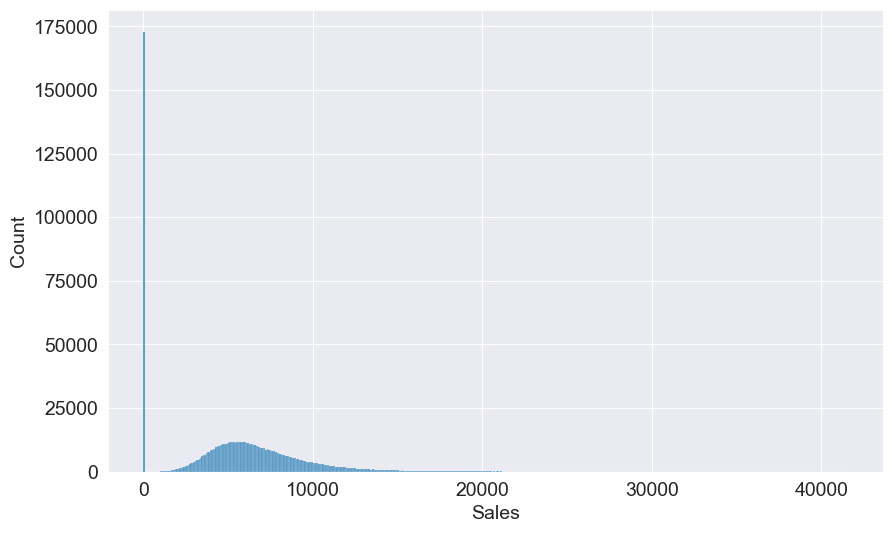

In [31]:
sns.histplot(data=merged_df, x='Sales')

    It seems like  the sales are 0 on so many dates,Let's check if this is because the store was closed.

In [33]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [34]:
merged_df.Open.value_counts()[0]

172817

    To make our modeling simple, let's simply exclude the dates when the store was closed (we can handle it as a special case while making predictions.

In [36]:
merged_df=merged_df[merged_df.Open==1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

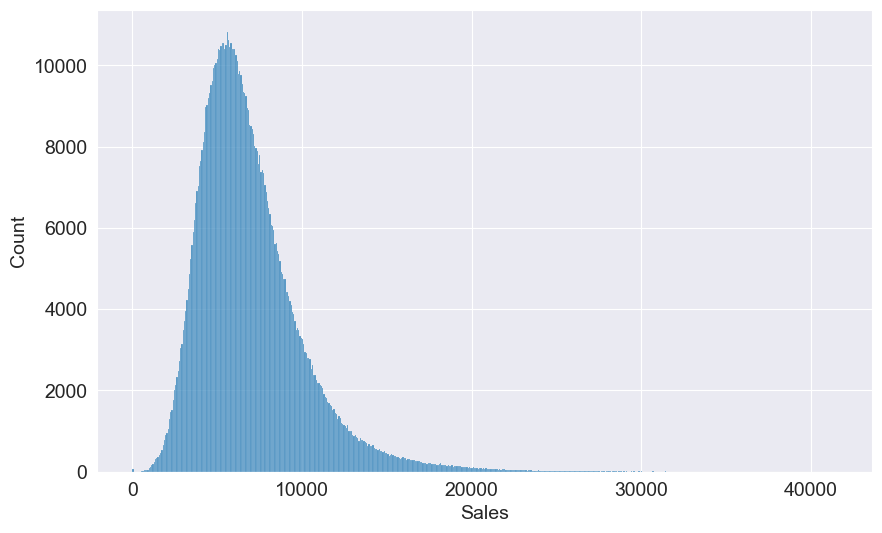

In [37]:
sns.histplot(data=merged_df, x='Sales')

    Let's explore some other columns

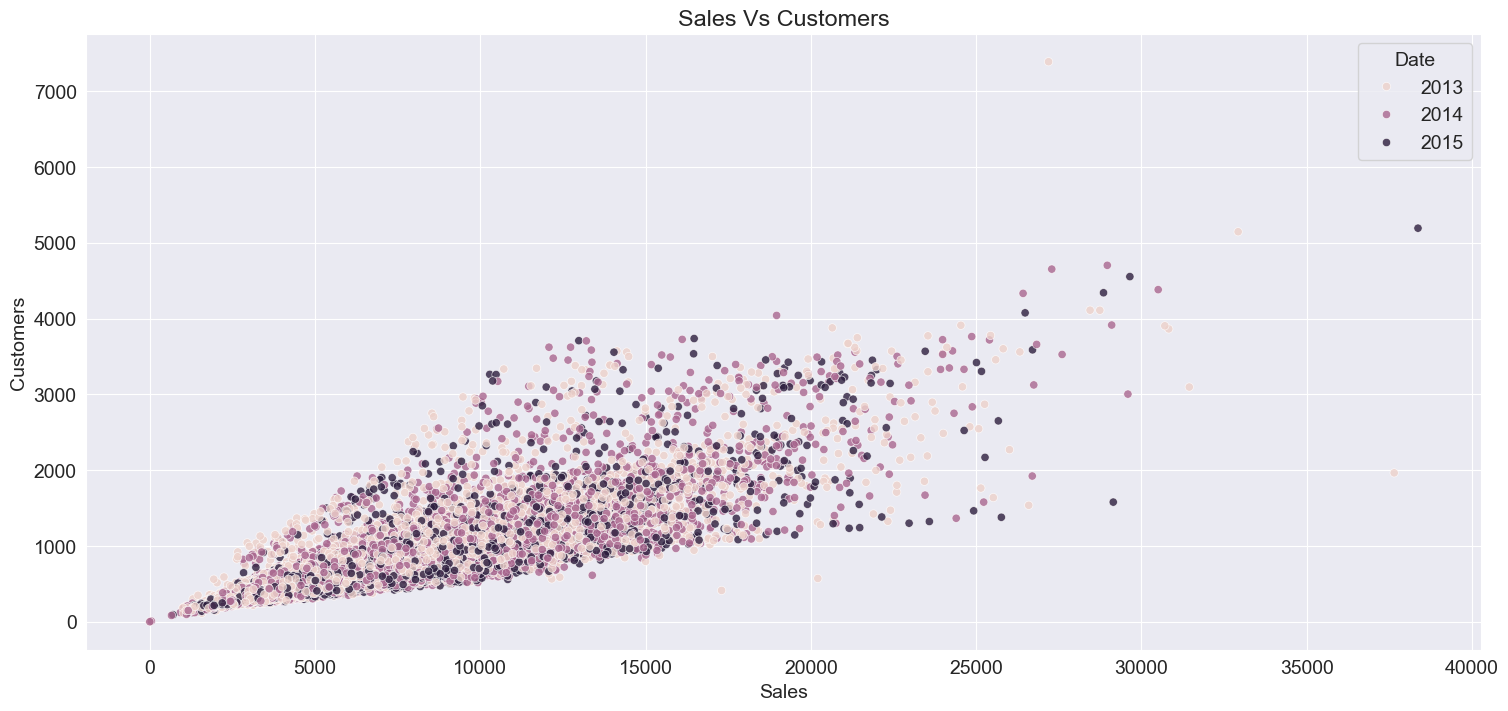

In [39]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

    Looks like there is a strong corelation between customer and sales. The more customer we have the more the sale is, but we need to keep this mind that this is not necessarily true because sometimes some customers spend more as in this scatterplot these are day wise data. Also we cannot use cuwstomer column, because we dont know howw many customer are going to come to the stores a few days later 

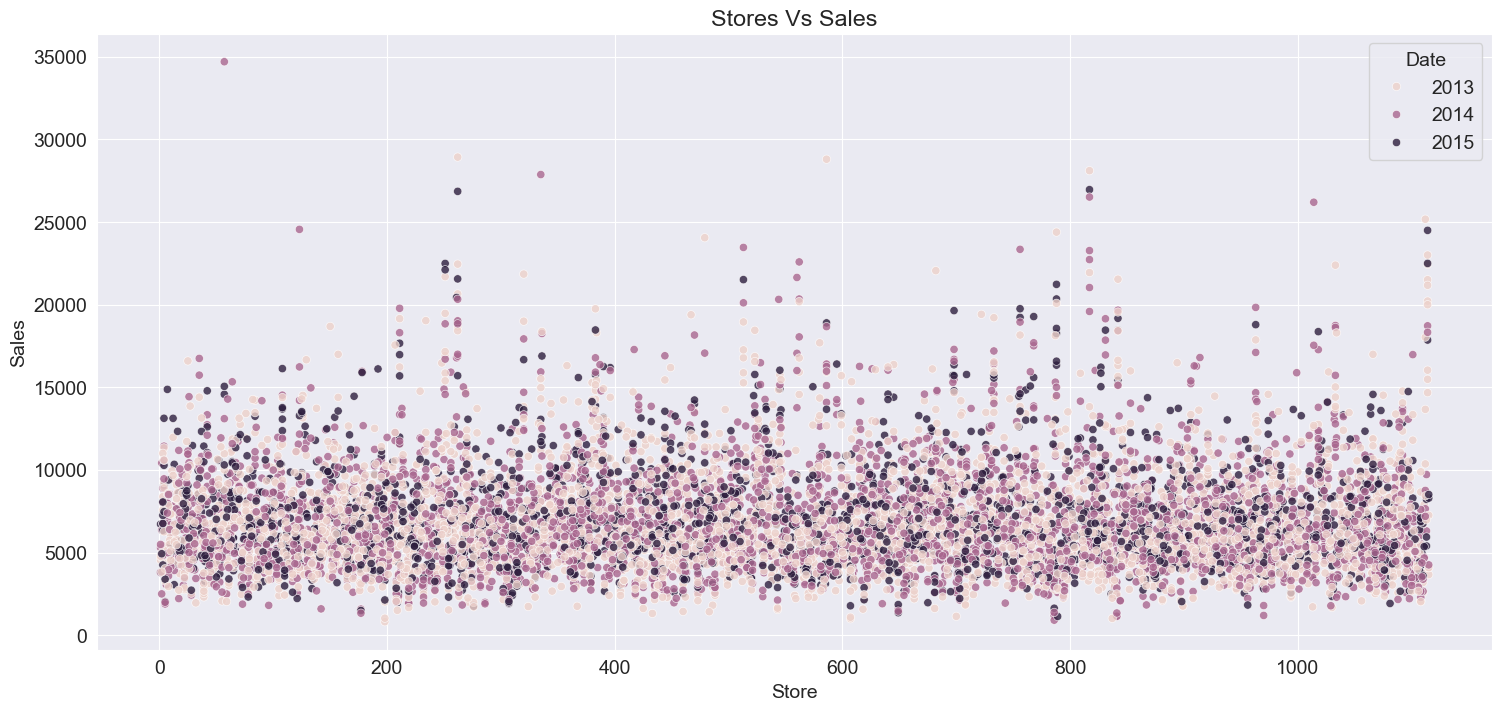

In [41]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

C:\Users\amrit\AppData\Local\Temp\ipykernel_2460\3387686068.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='DayOfWeek', ylabel='Sales'>

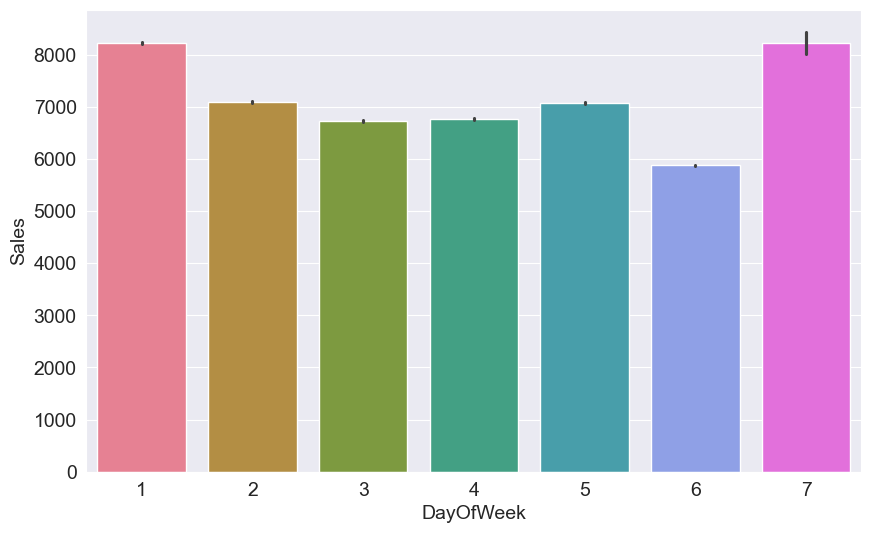

In [42]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales',palette="husl")

C:\Users\amrit\AppData\Local\Temp\ipykernel_2460\558664796.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Promo', ylabel='Sales'>

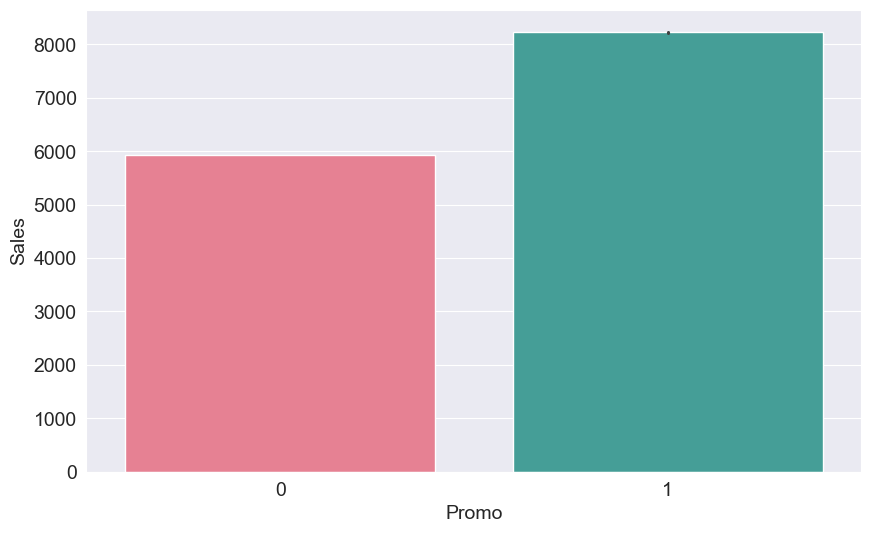

In [43]:
sns.barplot(data=merged_df, x='Promo', y='Sales',palette="husl")

In [44]:

# Converting all numeric columns to float (ignoring errors)
merged_df_numeric = merged_df.apply(pd.to_numeric, errors='coerce')

# Checking for non-numeric columns (if any)
non_numeric_columns = merged_df.columns[merged_df.dtypes == 'object']
print("Non-numeric columns:", non_numeric_columns)

# Now calculating correlation, ignoring NaN values
correlation = merged_df_numeric.corr()['Sales'].sort_values(ascending=False)
print(correlation)

Non-numeric columns: Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')
Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
Date                         0.062757
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
StateHoliday                      NaN
StoreType                         NaN
Assortment                        NaN
PromoInterval                     NaN
Name: Sales, dtype: float64


    The store is not really useful correlation because store is being treated here as a numerical value, but its more of a categorical value, we aren't see much correlation with store here. but store should have a big impact on the sale

# Feature Engineering
    Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources.

    For example, here are some features that can be extracted from the "Date" column:

Day of week

Day or month

Month

Year

Weekend/Weekday

Month/Quarter End

In [47]:
merged_df['Date']

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1016776   2013-01-01
1016827   2013-01-01
1016863   2013-01-01
1017042   2013-01-01
1017190   2013-01-01
Name: Date, Length: 844392, dtype: datetime64[ns]

In [48]:
merged_df['Day']=merged_df.Date.dt.day
merged_df['Month']=merged_df.Date.dt.month
merged_df['Year']=merged_df.Date.dt.year

In [49]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

C:\Users\amrit\AppData\Local\Temp\ipykernel_2460\953386222.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Year', ylabel='Sales'>

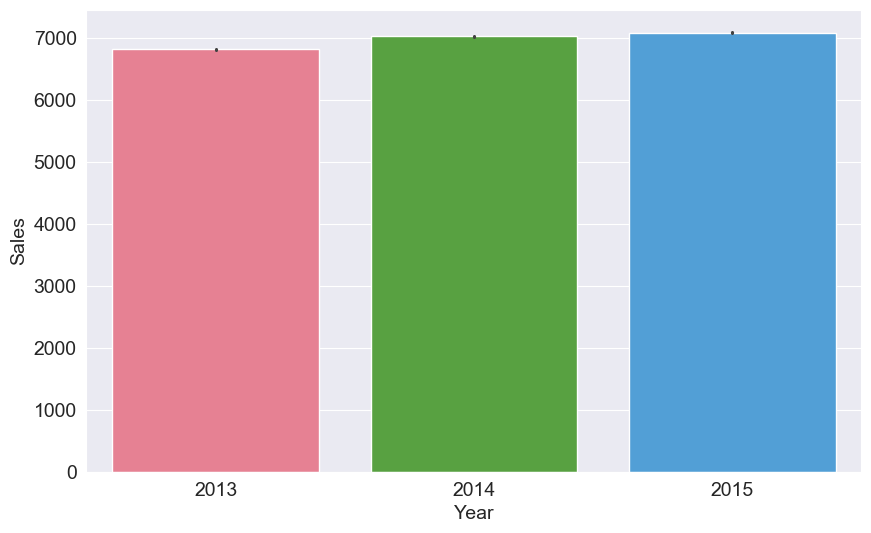

In [50]:
sns.barplot(data=merged_df, x='Year', y='Sales',palette="husl")

C:\Users\amrit\AppData\Local\Temp\ipykernel_2460\152383769.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Month', ylabel='Sales'>

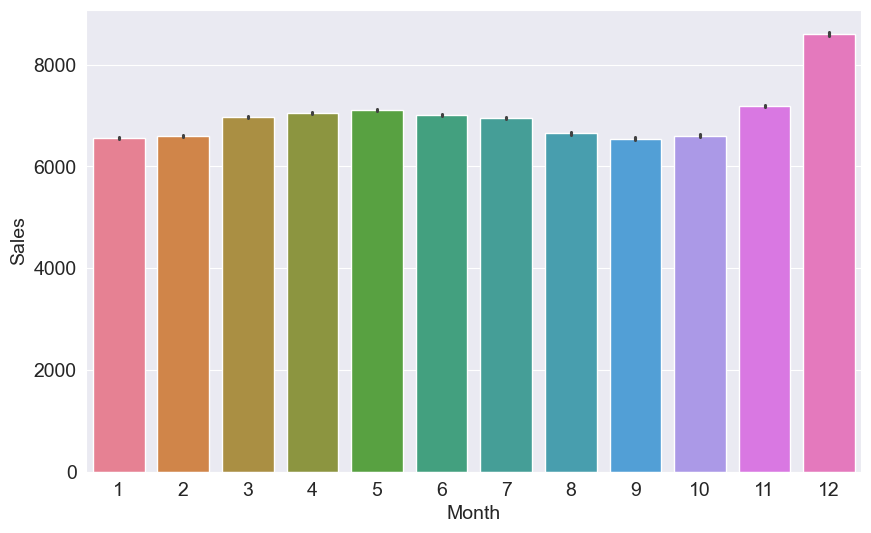

In [51]:
sns.barplot(data=merged_df, x='Month', y='Sales',palette="husl")

    We can also create new columns by getting information from external source. Using date information, we can also create new current columns like:

1. Weather on each day
2. Whether the date was a public holiday
3. Whether the store was running a promotion on that day.

In [53]:
merged_df['Day']

0          31
1          31
2          31
3          31
4          31
           ..
1016776     1
1016827     1
1016863     1
1017042     1
1017190     1
Name: Day, Length: 844392, dtype: int32

# Step 4 - Create a training/test/validation split and prepare the data for training

## Train/Test/Validation Split
    The data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similar strategy to create a validation set. We'll use the last 25% of rows for the validation set, after ordering by date

In [55]:
len(merged_df)

844392

In [56]:
train_size=int(.75*len(merged_df))
train_size

633294

In [57]:
sorted_df=merged_df.sort_values('Date')
train_df,val_df=sorted_df[:train_size],sorted_df[train_size:]
len(train_df),len(val_df)

(633294, 211098)

In [58]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,b,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,b,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,a,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,c,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,c,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [59]:
val_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
256637,751,3,2014-12-10,3720,533,1,0,0,0,a,a,650.0,10.0,2006.0,0,NaN,NaN,NaN,10,12,2014
256638,752,3,2014-12-10,4258,404,1,0,0,0,a,a,970.0,3.0,2013.0,1,31.0,2013.0,"Feb,May,Aug,Nov",10,12,2014
256639,753,3,2014-12-10,7170,654,1,0,0,0,d,c,540.0,11.0,2012.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec",10,12,2014
256640,754,3,2014-12-10,7359,837,1,0,0,0,c,c,380.0,5.0,2008.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",10,12,2014
256635,748,3,2014-12-10,4579,411,1,0,0,0,d,a,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,745,5,2015-07-31,8363,746,1,1,0,1,a,a,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",31,7,2015
745,746,5,2015-07-31,9082,638,1,1,0,1,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",31,7,2015
746,747,5,2015-07-31,10708,826,1,1,0,1,c,c,45740.0,8.0,2008.0,0,NaN,NaN,NaN,31,7,2015
740,741,5,2015-07-31,11253,1137,1,1,0,1,d,c,11900.0,NaN,NaN,0,NaN,NaN,NaN,31,7,2015


In [60]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [61]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [62]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [63]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [64]:

# Converting all numeric columns to float (ignoring errors)
merged_df_numeric = merged_df.apply(pd.to_numeric, errors='coerce')

# Checking for non-numeric columns (if any)
non_numeric_columns = merged_df.columns[merged_df.dtypes == 'object']
print("Non-numeric columns:", non_numeric_columns)

# Now calculating correlation, ignoring NaN values
correlation = merged_df_numeric.corr()['Sales'].sort_values(ascending=False)
print(correlation)

Non-numeric columns: Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')
Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
Month                        0.073600
Date                         0.062757
SchoolHoliday                0.038617
Year                         0.036169
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Day                         -0.051849
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
StateHoliday                      NaN
StoreType                         NaN
Assortment                        NaN
PromoInterval                     NaN
Name: Sales, dtype: float64


## Input and Target columns
    Let's also identify input and target columns. Note that we can't use the no. of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

In [66]:
input_cols=['Store', 'DayOfWeek', 'Promo',
       'StateHoliday',  'StoreType', 'Assortment',
       'Day', 'Month', 'Year']


In [67]:
target_cols='Sales'

    Let's also separate out numeric and categorical columns.

In [69]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [70]:
train_inputs,train_targets=train_df[input_cols].copy(),train_df[target_cols].copy()
val_inputs,val_targets=val_df[input_cols].copy(),val_df[target_cols].copy()

In [71]:
test_inputs=merged_test_df[input_cols].copy()
# Test data does not have targets

    Note that some columns can be treated as both numeric and categorical, and it's up t you to decide how you want to deal with them.

    Technically Store should treated as a categorical coulmn but the difficulty is creating  1115 coulmns of data is going to severely increase the size of the dataset. And also its going to make the models a bit harder to train because of something called curse of dimensionality, which means that if we have lots of different features, which all are closely correlated, then that alot easier for model to overfit, because now it has a lot more parameter to process with. So it can very easily overfit to the training data. And those models generally do not generalize very well. Aslo counting it as a numeric here may cause issue, but we can reorder the store, may be we can compute the average sale per store and based on that give a new numbering to the stores and that numbering could be reflective of the average sales so that a higher store number would mean higher average sale and a lower store number would mean lower average sale. We can try that out but lets just take it as a numeric column here. Linear model may be struggle but decision tree might be able to figure this out.
   
    linear model may be struggled when we have categorical data trated as numerical, but Decision  trees generally should be able to sort it out

In [74]:
numeric_cols= ['Store', 'Day', 'Promo','Month', 'Year']

In [75]:
categorical_cols=['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

    DayOfWeek (Categorical-Numerical Hybrid):
> Ideal Choice: Treat it as Categorical (Encoded as One-Hot or Label Encoded).

> Reason: Although it is a number, its values represent categories (Days of the Week: 1 to 7).

>Why Not Numerical: Using it as a numerical value would force the model to assume a linear relationship (e.g., Monday < Tuesday < Wednesday), which is not true for days.

# Imputation, Scaling and Encode
    Let's impute missing data from numeric columns and scale the values to the (0,1) range.

In [78]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])


In [79]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [80]:
test_inputs[numeric_cols].isna().sum()

Store    0
Day      0
Promo    0
Month    0
Year     0
dtype: int64

    Note that this step wasn't necessary for the store sales dataset, as there were no null values. Also, we can apply a different imputation strategy to different columns depending on their distributions (e.g. mean for normally distribute and median for exponentially distributed).

    Let's also scale the values to the (0,1) range.

In [82]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
1017190,1097.0,2,0.0,a,b,b,1.0,1.0,2013.0
1016179,85.0,2,0.0,a,b,a,1.0,1.0,2013.0
1016353,259.0,2,0.0,a,b,b,1.0,1.0,2013.0
1016356,262.0,2,0.0,a,b,a,1.0,1.0,2013.0
1016368,274.0,2,0.0,a,b,b,1.0,1.0,2013.0
...,...,...,...,...,...,...,...,...,...
256632,745.0,3,0.0,0,a,a,10.0,12.0,2014.0
256642,756.0,3,0.0,0,a,c,10.0,12.0,2014.0
256634,747.0,3,0.0,0,c,c,10.0,12.0,2014.0
256633,746.0,3,0.0,0,d,c,10.0,12.0,2014.0


In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [85]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [86]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
1017190,0.983842,2,0.0,a,b,b,0.0,0.0,0.0
1016179,0.075404,2,0.0,a,b,a,0.0,0.0,0.0
1016353,0.231598,2,0.0,a,b,b,0.0,0.0,0.0
1016356,0.234291,2,0.0,a,b,a,0.0,0.0,0.0
1016368,0.245063,2,0.0,a,b,b,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0.0,0,a,a,0.3,1.0,1.0
256642,0.677738,3,0.0,0,a,c,0.3,1.0,1.0
256634,0.669659,3,0.0,0,c,c,0.3,1.0,1.0
256633,0.668761,3,0.0,0,d,c,0.3,1.0,1.0


    let's encode categorical columns as one-hot vectors.

In [88]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [90]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [91]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,2,0.0,a,b,b,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,2,0.0,a,b,a,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,2,0.0,a,b,b,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,2,0.0,a,b,a,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,2,0.0,a,b,b,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0.0,0,a,a,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,3,0.0,0,a,c,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,3,0.0,0,c,c,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,3,0.0,0,d,c,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


    Let's now extract out the numeric data.

In [93]:
X_train=train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [94]:
X_train

,Store,Day,Promo,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Step 5 - Create quick & easy baseline models to benchmark future models

    A quick baseline model helps establish the minimum score any ML model you train should achieve.

### Fixed/Random Guess
    Let's define a model that always returns the mean value of Sales as the prediction.

In [96]:
merged_df.Sales.mean()

6955.514290755952

In [97]:
def return_mean(input):
    return np.full(len(input),merged_df.Sales.mean())

In [98]:
train_preds = return_mean(X_train)
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

    Let's evaluate this to using the RMSE score.

In [100]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(train_preds, train_targets)

3082.450443277419

In [101]:
root_mean_squared_error(return_mean(X_val), val_targets)

3168.6033635047716

    The model is off by about $3000 on average.
    If our model's RMSE is higher than the baseline RMSE (3082.45), it means:

- our model is worse than simply predicting the average sales for all cases.

It indicates our model has failed to learn any useful pattern and is performing worse than a basic average-based approach.

What This Implies:

- model is useless if its RMSE is higher than the baseline.

- we should aim for an RMSE significantly lower than the baseline.

    Let's try another model, which makes a random guess between the lowest and highest sale.


In [104]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [105]:
train_preds = guess_random(X_train)
train_preds

array([ 1235.85577304,  6510.75678868, 39047.46078958, ...,
       29510.82593924, 30056.63660703, 32623.60978358])

In [106]:
root_mean_squared_error(train_preds, train_targets)

18591.10151753145

In [107]:
root_mean_squared_error(guess_random(X_val), val_targets)

18413.09138110478

    Clearly, this model is much worse.

## Baseline ML model
    Let's train a simple LinearRegression model, with no customization.

In [110]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train,train_targets)

In [111]:
train_preds=linreg.predict(X_train)
train_preds

array([ 7072., 10524.,  6984., ...,  6252.,  6012.,  5620.])

In [112]:
root_mean_squared_error(train_preds,train_targets)

2741.621903798656

In [113]:
val_preds=linreg.predict(X_val)
val_preds

array([5620., 5620., 6012., ..., 8664., 8424., 7856.])

In [114]:
root_mean_squared_error(val_preds, val_targets)

2818.043580445419

    Note that a simple linear regression model isn't much better than our fixed baseline model which always predicts the mean.

    Based on the above baselines, we now know that any model we train should have ideally have a RMSE score lower than $2800. This baseline can also be conveyed to other stakeholders to get a sense of whether the range of loss makes sense.

# Step 6 - Pick a strategy, train a model & tune hyperparameters

### Systematically Exploring Modeling Strategies
    Scikit-learn offers the following cheatsheet to decide which model to pick.



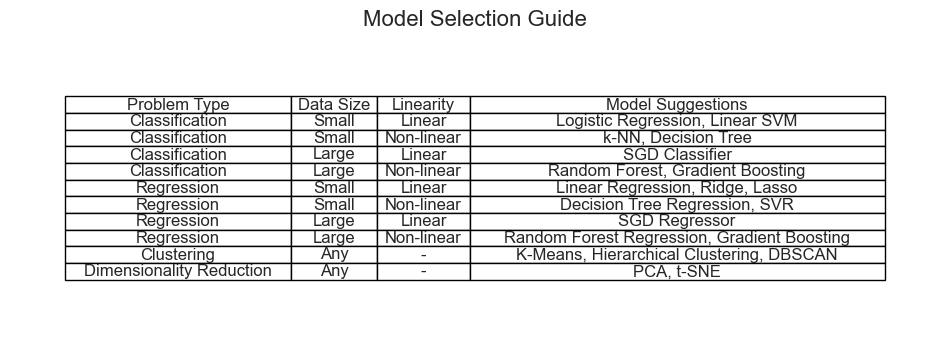

In [117]:
# Data for model selection
data = {
    'Problem Type': ['Classification', 'Classification', 'Classification', 'Classification', 
                     'Regression', 'Regression', 'Regression', 'Regression',
                     'Clustering', 'Dimensionality Reduction'],
    'Data Size': ['Small', 'Small', 'Large', 'Large', 'Small', 'Small', 'Large', 'Large', 'Any', 'Any'],
    'Linearity': ['Linear', 'Non-linear', 'Linear', 'Non-linear', 
                  'Linear', 'Non-linear', 'Linear', 'Non-linear', '-', '-'],
    'Model Suggestions': [
        'Logistic Regression, Linear SVM', 'k-NN, Decision Tree', 
        'SGD Classifier', 'Random Forest, Gradient Boosting',
        'Linear Regression, Ridge, Lasso', 'Decision Tree Regression, SVR',
        'SGD Regressor', 'Random Forest Regression, Gradient Boosting',
        'K-Means, Hierarchical Clustering, DBSCAN', 'PCA, t-SNE'
    ]
}

# Creating a DataFrame
data_df = pd.DataFrame(data)

# Displaying the table
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')
table = ax.table(cellText=data_df.values, colLabels=data_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(data_df.columns))))
plt.title("Model Selection Guide", fontsize=16)
plt.show()


### Here's the general strategy to follow:

- Find out which models are applicable to the problem you're solving.
- Train a basic version for each type of model that's applicable
- Identify the modeling approaches that work well and tune their hypeparameters
- Use a spreadsheet to keep track of your experiments and results.
  
        Let's define a function try_model, which takes a model, then performs training and evaluation.

In [119]:
def try_model(model):
    # Fit the model
    model.fit(X_train,train_targets)

    # Generate predictions
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_val)

    # Compute RMSE
    train_rmse=root_mean_squared_error(train_preds,train_targets)
    val_rmse = root_mean_squared_error(val_targets, val_preds)
    return train_rmse,val_rmse
    

# Linear Models
    Read about linear models here:
- https://scikit-learn.org/stable/modules/linear_model.html

In [121]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [122]:
try_model(LinearRegression())

(2741.621903798656, 2818.043580445419)

In [123]:
try_model(Ridge())

(2741.587195090344, 2817.7784630687306)

In [124]:
try_model(Lasso())

(2741.7143903412966, 2817.947289745474)

In [125]:
try_model(ElasticNet())

(2919.7592486698477, 3010.8450540391977)

In [126]:
try_model(SGDRegressor())

(2741.8747922743587, 2822.469819065664)

    We can see the linear model are not doing very well, may be bacause the relationship are not linear between input and target. Sale is not linear combination of the input columns. It's non linear relationship

In [128]:
#We can Try changing hyperparmeters in the above models and see if you can get a better result. For Example
try_model(Ridge(alpha=100,solver='cholesky',max_iter=1000))

(2741.6141566833485, 2817.669231484314)

# Tree Based Models
- Decision trees: https://scikit-learn.org/stable/modules/tree.html
- Random forests and gradient boosting: https://scikit-learn.org/stable/modules/ensemble.html

In [130]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [131]:
tree=DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1550.0387025163966)

    Seems like the decision tree performs much better than linear models.

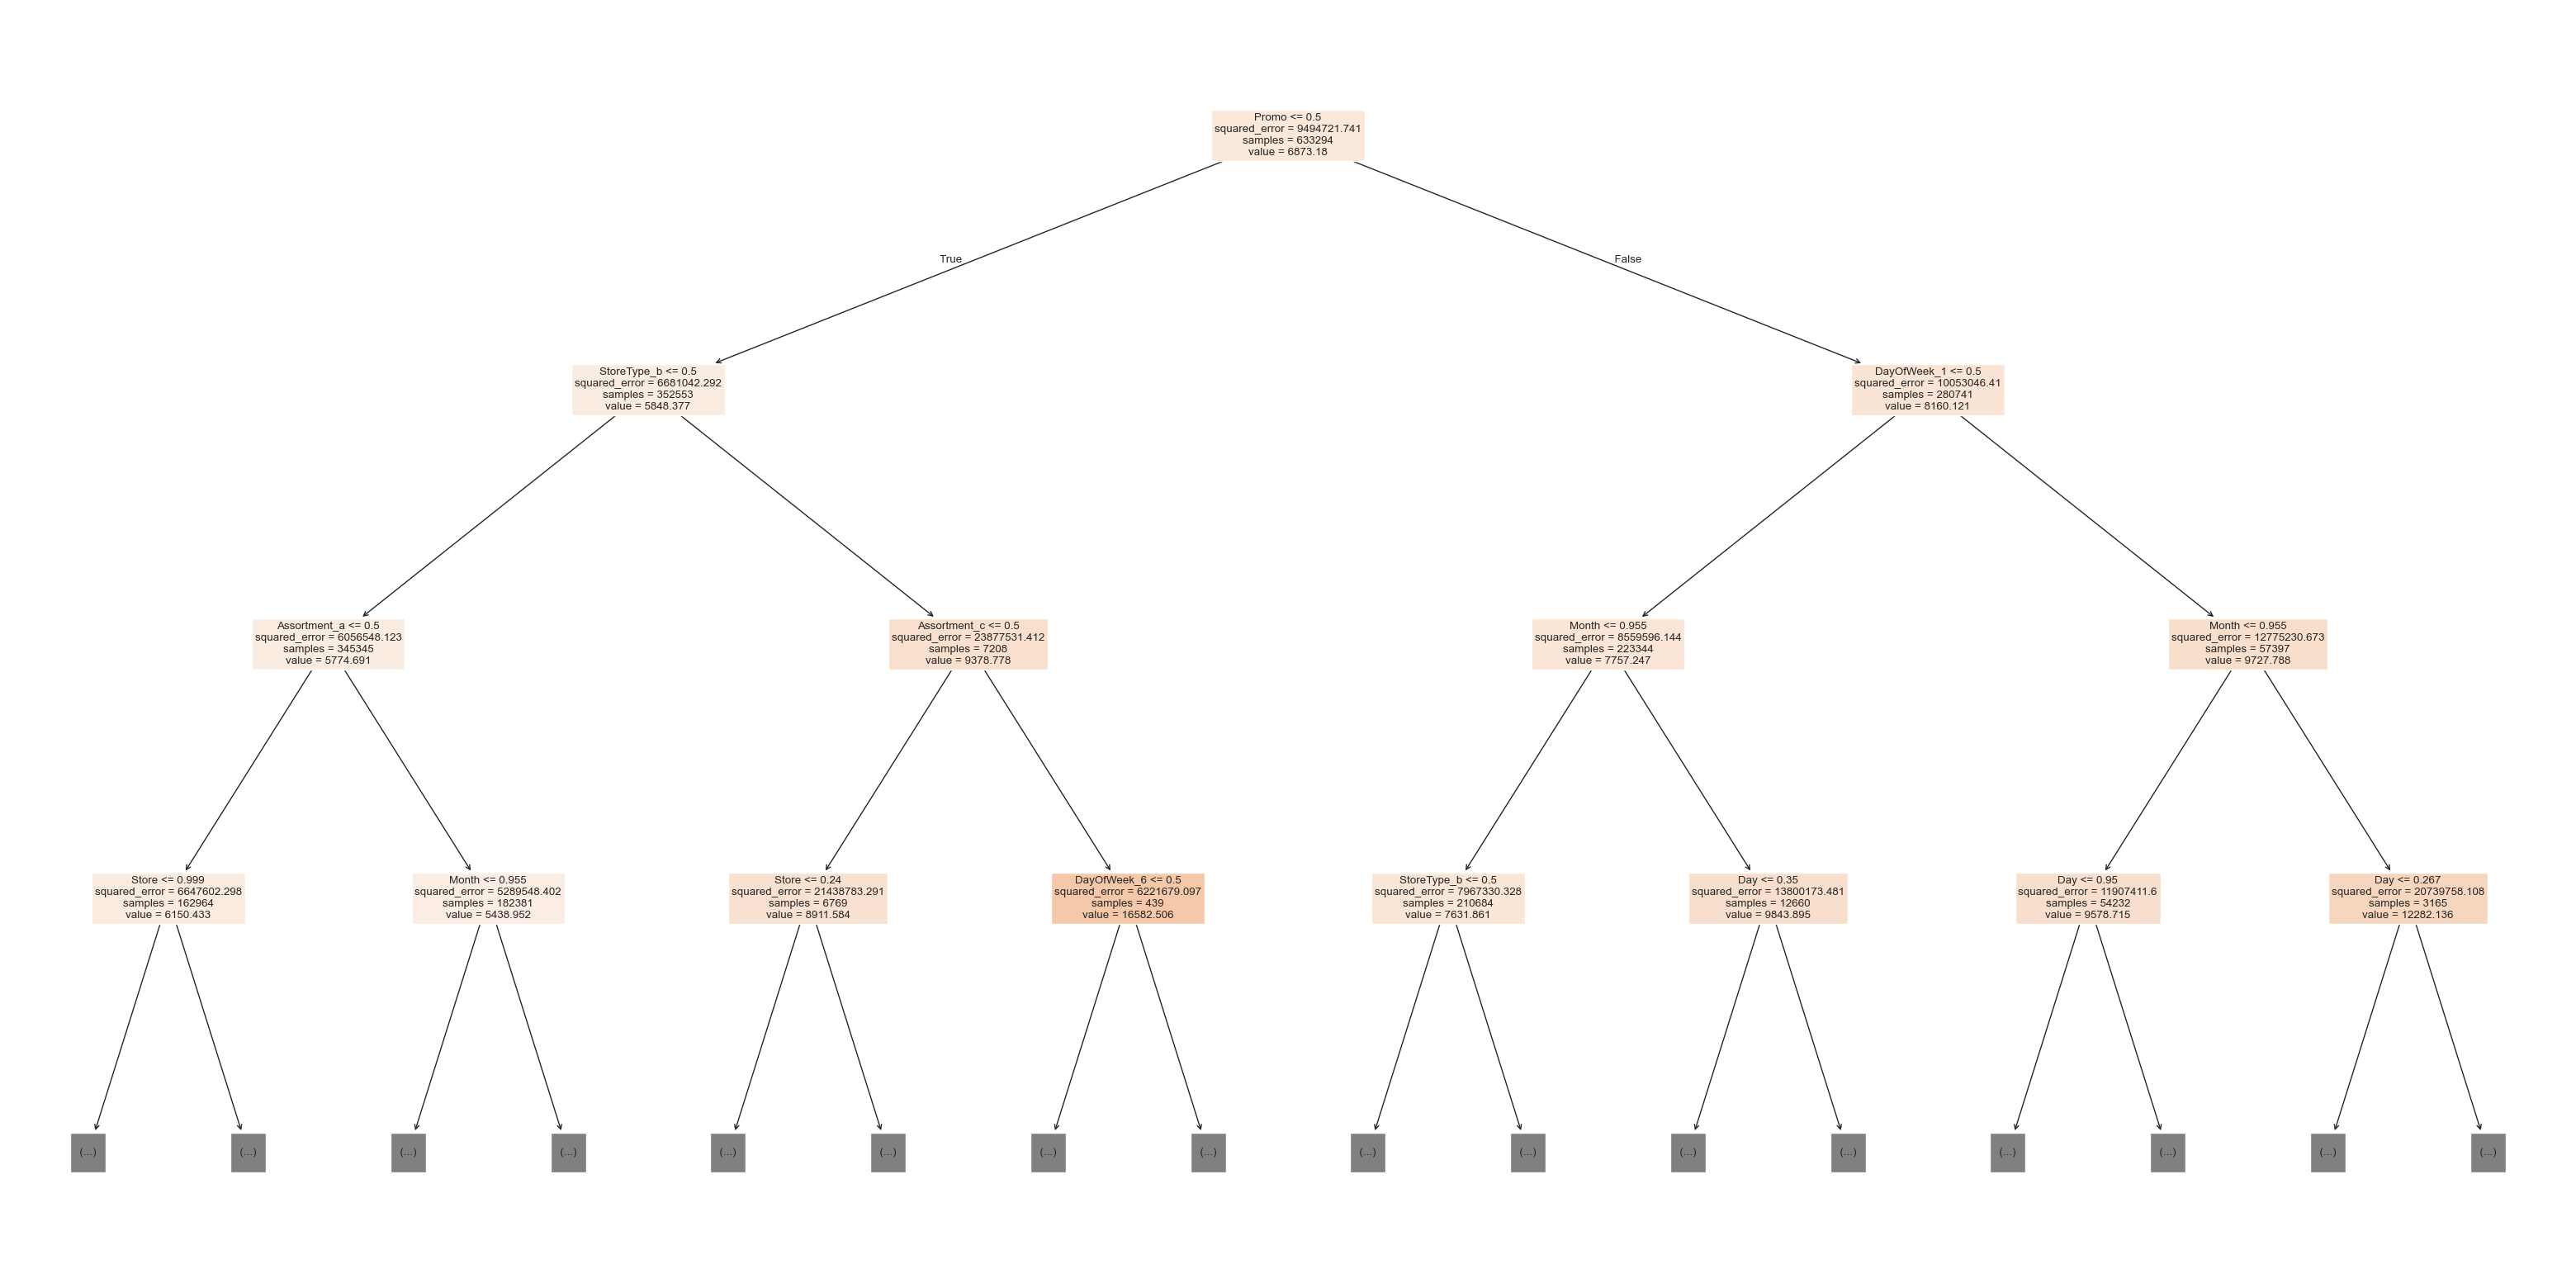

In [133]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

In [134]:
%%time
#Let's try a random forest.

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

CPU times: total: 11min 30s
Wall time: 1min 23s


(474.98976880814877, 1370.5848972687284)

    We've seen a significant reduction in the loss by using a random forest.

# Other Supervised Learning Models
See https://scikit-learn.org/stable/supervised_learning.html

# Step 7 - Experiment and combine results from multiple strategies

    In general, the following strategies can be used to improve the performance of a model:

- Gather more data. A greater amount of data can let you learn more relationships and generalize the model better.
- Include more features. The more relevant the features for predicting the target, the better the model gets.
- Tune the hyperparameters of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
- Look at the specific examples where the model make incorrect or bad predictions and gather some insights
- Try strategies like grid search for hyperparameter optimization and K-fold cross validation
- Combine results from different types of models (ensembling), or train another model using their results.
## Hyperparameter Optimization & Grid Search
    we can tune hyperparameters manually, our use an automated tuning strategy like random search or Grid search. Follow this tutorial for hyperparameter tuning using Grid search: 
https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

# K-Fold Cross Validation
    Here's what K-fold cross validation looks like visually

<img src='K-Flod Cross Validation.png'>

    For the 1st split we use the fold1 as validation data and similarly for split2 fold2 is validation data and so on. here we are training five different model on 80% of data and each time its  a different 80%. and then it can make predication using all 5 of those model and simply average those prediction out. Now the benefit of this is instead of setting aside a single validation set, we have used all of the traing data while still doing validation, so we still have a validation score that we can look at and use for tuing hyper parameters. But the disadvantage is we are traing the whole data here which going to perform poorly for time series data or data ordered by time, because ideally we want to keep the validation data at the  very end of the time period, 
     Follow this tutorial to apply K-fold cross validation: 
https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

- Grid Search: A technique to find the best hyperparameters by trying all combinations of specified values. It can use cross-validation to evaluate each combination.

- K-Fold Cross-Validation: A method to evaluate model performance. It can be used with or without hyperparameter tuning (like Grid Search).

# Ensembling and Stacking

## Ensembling
    Ensembling refers to combining the results of multiple models. Here's what ensembling looks like visually
source: https://www.kdnuggets.com/2019/01/ensemble-learning-5-main-approaches.html

<img src='Ensembling and Stacking.png'>

    
    Ensembling is a technique in machine learning that involves combining the results of multiple models to improve prediction accuracy. In practice, this means training several different models—such as a linear regression model, a support vector machine (SVM), a random forest, and a gradient boosting machine—on the same data. Each model makes its own predictions, and these predictions are then combined. For classification tasks, the final prediction is determined by majority voting among the models, while for regression tasks, the predictions are averaged. This approach is an extension of the concept used in random forests, where multiple decision trees are trained, and their predictions are averaged to achieve better results. In ensembling, however, the models are more diverse, ranging from linear models to tree-based models or even kernel-based models like SVM. The diversity of models allows them to capture different patterns in the data, which, when combined, can lead to more accurate predictions than any single model alone. Additionally, ensembling can be enhanced by assigning different weights to the models based on their performance. For example, if a particular model consistently performs well, it can be given higher weight in the final prediction calculation. As an exercise, you can try ensembling by training a random forest and a ridge regressor separately, obtaining predictions from each, and then averaging these predictions. You can also apply weighted averaging, such as giving 80% weight to the random forest and 20% to the ridge regressor, and observe if this improves performance. This exercise helps illustrate how combining diverse models can sometimes result in better performance than any individual model alone, as their errors may cancel out.

## Stacking
    Stacking is a more advanced version of ensembling, where we train another model using the results from multiple models. Here's what stacking looks like visually (source):

<img src='Stacking.png'>

    Stacking is an advanced version of ensembling where a separate model is trained using the predictions of multiple base models. In stacking, each base model can be assigned different weights, for example, Model 1 might get a weight of 0.8, Model 2 might get 0.1, and Model 3 might get 0.05. These advanced techniques are particularly useful in production environments. However, running all base models at once can be resource-intensive and slow. Therefore, in practice, ensembling usually involves only two or three models. Stacking can also be extended to multiple layers, creating a layered structure where each layer builds on the predictions of the previous one. However, a single layer of stacking is most commonly used in industry because it strikes a balance between complexity and performance. The goal of stacking is to optimize model performance by minimizing validation loss or maximizing validation accuracy. A common approach is to use a simple model, such as linear regression, as the meta-model, which takes the outputs of the base models as input and determines the optimal weights for each model’s predictions. This process helps ensure that the final prediction is the most accurate possible combination of the base models. Stacking is, therefore, a natural extension of ensembling, providing a more sophisticated way to leverage the strengths of multiple models.

Here's a tutorial on stacking: 

https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

# Step 8 - Interpret models, study individual predictions & present your findings

## Feature Importance
    we'll need to explain why your model returns a particular result. Most scikit-learn models offer some kind of "feature importance" score. As we used the Random Forest as model we can check by using feature_importances_ 

In [235]:
rf.feature_importances_

array([6.08201696e-01, 4.88552680e-02, 1.38867055e-01, 4.71773755e-02,
       9.28374752e-03, 3.36881882e-02, 4.41881527e-03, 2.43830442e-03,
       2.10866695e-03, 5.65372364e-03, 6.96871983e-03, 4.48370154e-03,
       1.18908570e-03, 2.07813139e-04, 2.56289518e-05, 1.64240776e-05,
       1.35928041e-02, 2.25737142e-02, 1.05720946e-02, 1.33738598e-02,
       8.85429214e-03, 5.45779887e-03, 1.19912225e-02])

In [242]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.608202
2,Promo,0.138867
1,Day,0.048855
3,Month,0.047177
5,DayOfWeek_1,0.033688
17,StoreType_b,0.022574
16,StoreType_a,0.013593
19,StoreType_d,0.013374
22,Assortment_c,0.011991
18,StoreType_c,0.010572


C:\Users\amrit\AppData\Local\Temp\ipykernel_2460\1370656565.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




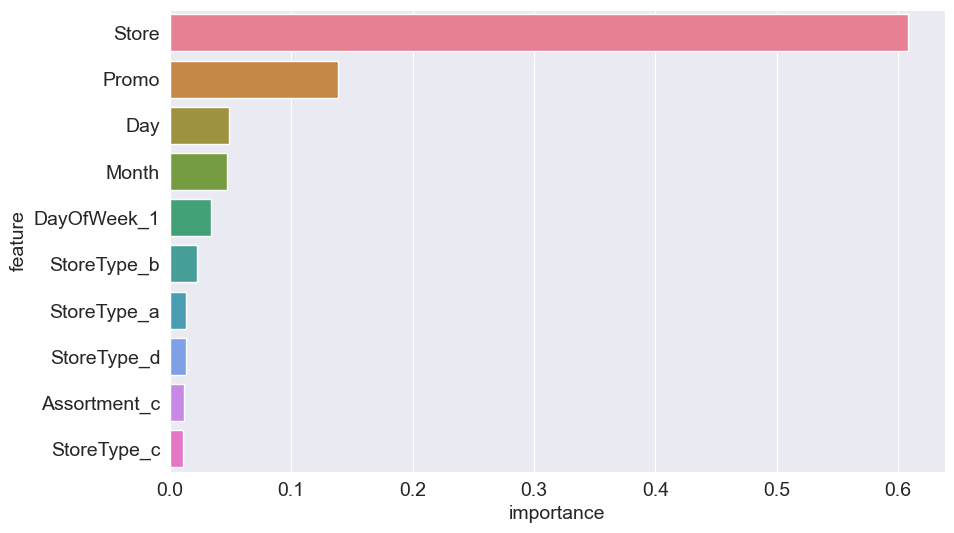

In [247]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature',palette="husl");


    The above chart can be presented to non-technical stakeholders to explain how the model arrives at its result. For greater explainability, a single decision tree can be used.
    
    In your presentation, you want to clearly showcase the importance of different features in determining sales. For instance, you can highlight that the store itself is the most significant factor influencing sales. Following that, promotion appears to be the next most critical factor. Additionally, features like the day, month, and day of the week also play a vital role, while aspects like the store type have some impact as well. This analysis can guide you to consider adding more relevant features that better describe the store. For example, the store's area, its location, and the number of employees working there could all be significant indicators of its business potential. Since this data is readily available, incorporating these additional features into your analysis could significantly improve your sales predictions.

### Looking at individual predictions

In [255]:
def predict_input(model,single_input):
    if single_input['Open']==0:
        return 0
    input_df=pd.DataFrame([single_input])
    
    #convering Date column's datatype to date format 
    input_df['Date'] = pd.to_datetime(input_df.Date)
    
    #creating new features from Date column
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year

    #preproccsing the data
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]

    pred = model.predict(X_input)[0]
    return pred
    

    
    

In [257]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [259]:
predict_input(rf,sample_input)

4228.28

    In your presentation, you should emphasize the importance of showcasing individual predictions rather than just focusing on the training curve, which may not be as impactful. For this, you can build a tool that allows users, such as store managers, to input specific values and receive predictions directly from the model. The process begins with receiving an input in the form of a dictionary. If the store is closed, the model immediately returns a prediction of zero. If it is open, the input data is processed similarly to the training data — including date conversion, feature extraction, and pre-processing (such as imputing missing values, scaling, and encoding). After pre-processing, the input is transformed into a single row of numeric data suitable for model prediction. This setup allows you to demonstrate the model’s predictions using various inputs and assess the model's real-world performance. Additionally, store managers can test the model with their own data, and if they find the predictions unreasonable, this feedback can help identify potential model issues, such as unintended correlations or incorrect features. This approach not only improves the model’s reliability but also strengthens collaboration between data scientists and business users, ensuring that the model aligns with practical expectations.

    Look at various examples from the training, validation and test sets to decide if you're happy with the result of your model.

## Presenting your results
- Create a presentation for non-technical stakeholders
- Understand your audience - figure out what they care about most
- Avoid showing any code or technical jargon, include visualizations
- Focus on metrics that are relevant for the business
- Talk about feature importance and how to interpret results
- Explain the strengths and limitations of the model
- Explain how the model can be improved over time

    Lets check score on the test set.

In [263]:
test_preds=rf.predict(X_test)
test_preds

array([ 4228.28,  7714.09,  8796.3 , ...,  5944.12, 20870.2 ,  6775.27])

## Model Deployment
    At this point, the model can be handed over to a software developer / ML engineer who can put the model into production, as part of an existing software system. It's important to monitor the results of the model, and make improvements from time to time.

    Check out this tutorial on how to deploy a model to the Heroku platform using the Flask framework:
https://towardsdatascience.com/create-an-api-to-deploy-machine-learning-models-using-flask-and-heroku-67a011800c50

    Check out the following resources to learn more:

- https://vas3k.com/blog/machine_learning/
- https://github.com/abhishekkrthakur/approachingalmost
- https://scikit-learn.org/stable/
- https://github.com/microsoft/ML-For-Beginners

